In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


In [4]:
data = pd.merge(customers, transactions, on="CustomerID", how="inner")

In [5]:
numeric_data = data.select_dtypes(include=np.number).fillna(0)

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [7]:
clusters_range = range(2, 11)
db_indices = []
silhouette_scores = []

In [8]:
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, labels)
    silhouette_avg = silhouette_score(scaled_data, labels)
    db_indices.append(db_index)
    silhouette_scores.append(silhouette_avg)

C:\Users\vaish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\vaish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\vaish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\vaish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

In [9]:
best_n_clusters = clusters_range[np.argmin(db_indices)]

In [10]:
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\vaish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


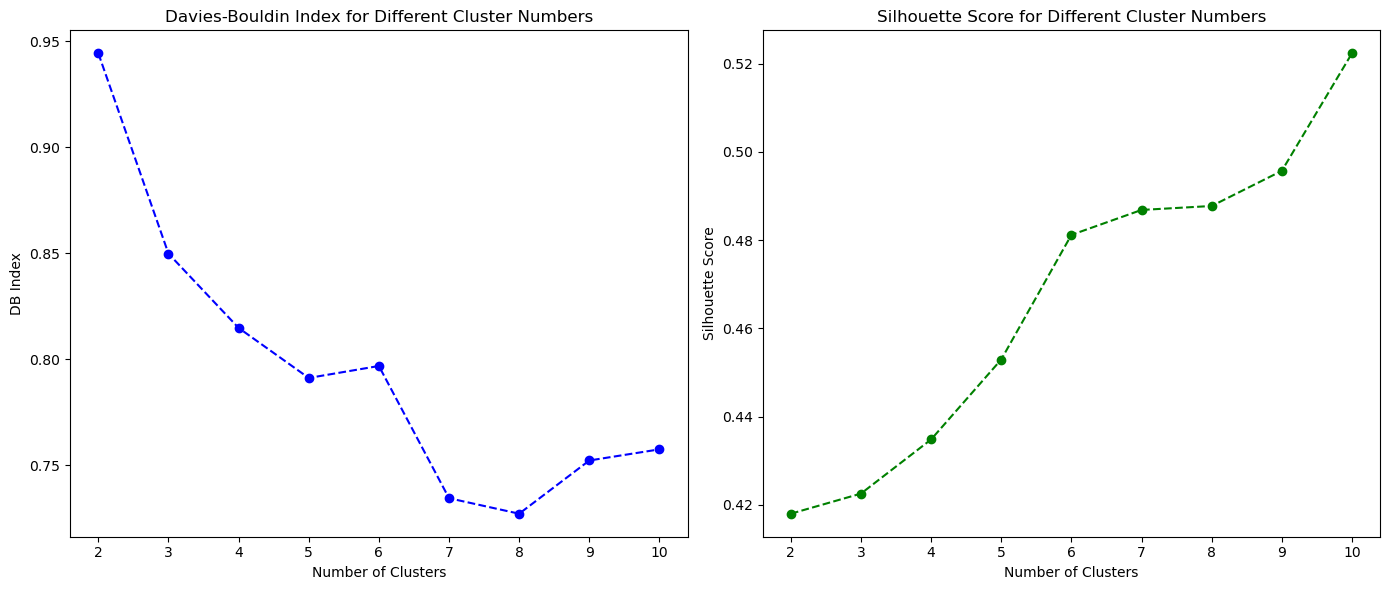

In [11]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(clusters_range, db_indices, marker='o', linestyle='--', color='b')
plt.title('Davies-Bouldin Index for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.xticks(clusters_range)

plt.subplot(1, 2, 2)
plt.plot(clusters_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(clusters_range)

plt.tight_layout()
plt.show()

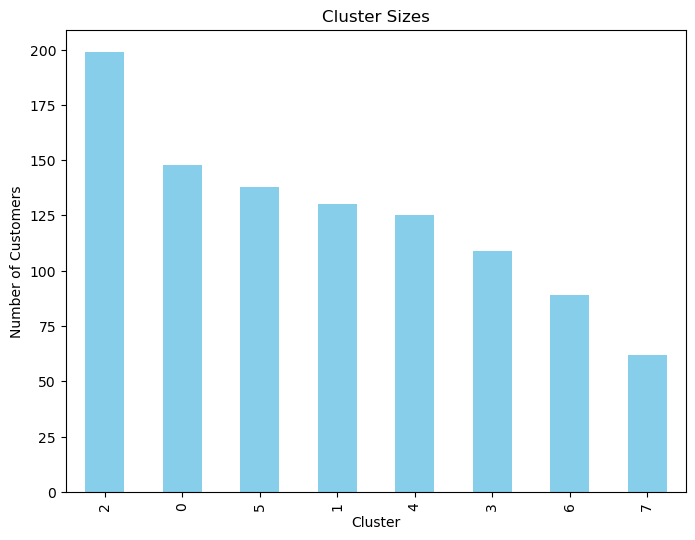

In [14]:
cluster_sizes = data['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

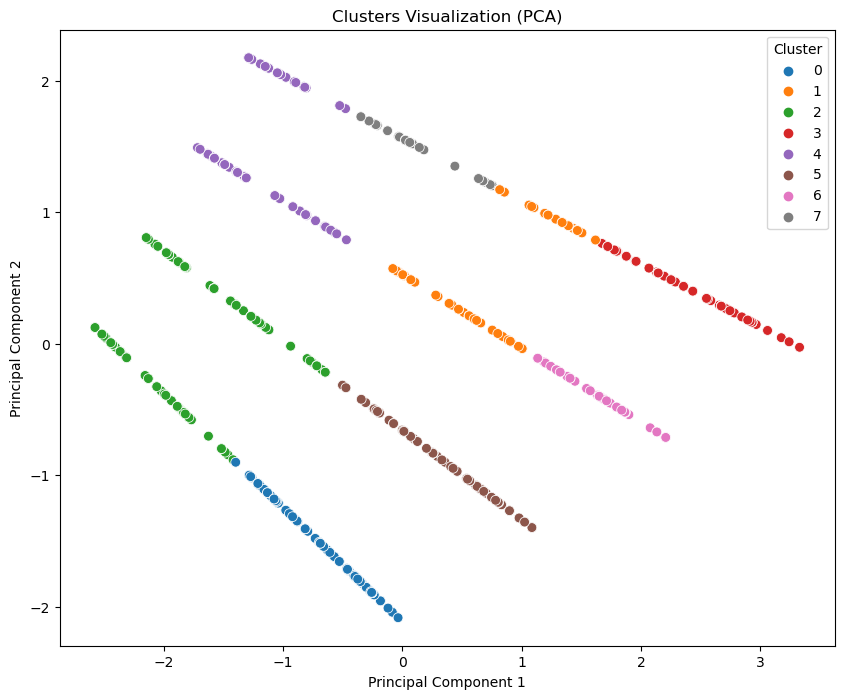

In [15]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='tab10', s=50)
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

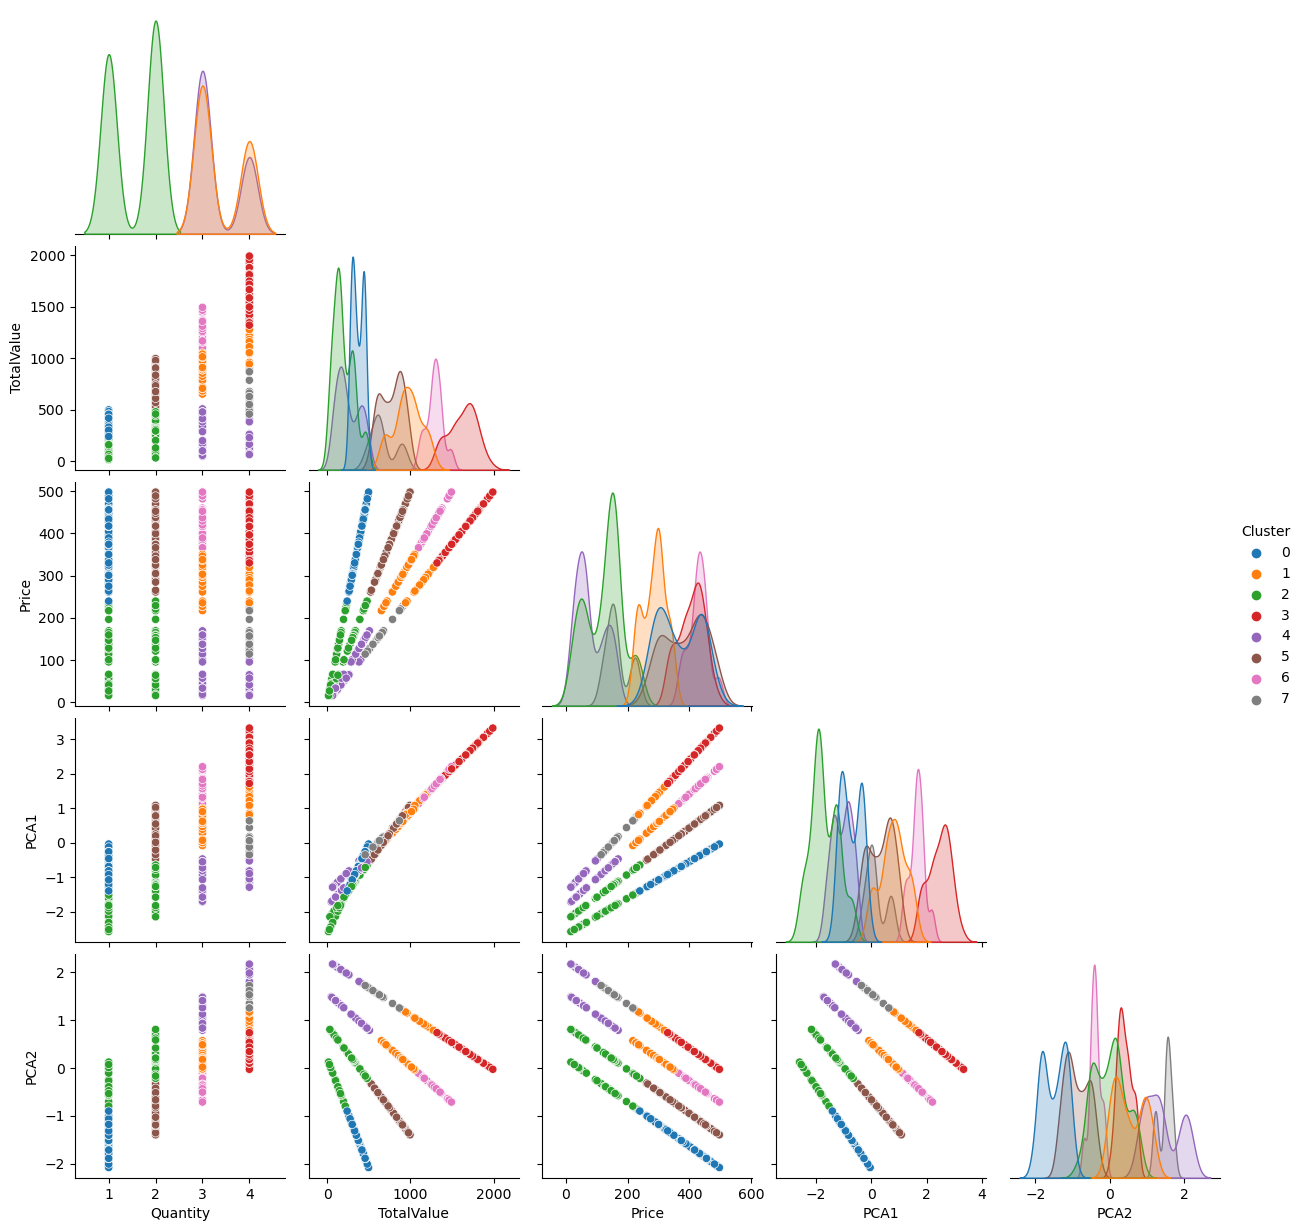

In [16]:
sns.pairplot(data, hue='Cluster', diag_kind='kde', corner=True, palette='tab10')
plt.show()

In [17]:
report = {
    "Number of Clusters": best_n_clusters,
    "Best DB Index Value": min(db_indices),
    "Best Silhouette Score": silhouette_scores[np.argmin(db_indices)],
    "Cluster Sizes": cluster_sizes.to_dict()
}

print("Clustering Report:")
for key, value in report.items():
    print(f"{key}: {value}")

Clustering Report:
Number of Clusters: 8
Best DB Index Value: 0.7270574365948117
Best Silhouette Score: 0.48772709320571755
Cluster Sizes: {2: 199, 0: 148, 5: 138, 1: 130, 4: 125, 3: 109, 6: 89, 7: 62}
